In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm, trange
import os
import xarray as xr

sns.set(style="darkgrid")

In [51]:
# demo tqdm
from time import sleep
for i in tqdm(range(100)):
    sleep(0.01)


100%|██████████| 100/100 [00:01<00:00, 96.35it/s]


 Analyse PV data with xarray

In [52]:
path_PV = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_PV\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0002.EC.REF2016.PV.nc"

C:\Users\flore\AppData\Local\Temp\ipykernel_9624\3834503062.py:1: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


<xarray.Dataset> Size: 40MB
Dimensions:    (lon: 1, lat: 1, time: 292000, bnds: 2)
Coordinates:
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 0.0
  * time       (time) object 2MB 0001-01-01 00:00:00 ... 0100-12-31 21:00:00
Dimensions without coordinates: bnds
Data variables: (12/29)
    time_bnds  (time, bnds) object 5MB ...
    PV_AT      (time, lat, lon) float32 1MB ...
    PV_BE      (time, lat, lon) float32 1MB ...
    PV_BG      (time, lat, lon) float32 1MB ...
    PV_CY      (time, lat, lon) float32 1MB ...
    PV_CZ      (time, lat, lon) float32 1MB ...
    ...         ...
    PV_PT      (time, lat, lon) float32 1MB ...
    PV_RO      (time, lat, lon) float32 1MB ...
    PV_SE      (time, lat, lon) float32 1MB ...
    PV_SI      (time, lat, lon) float32 1MB ...
    PV_SK      (time, lat, lon) float32 1MB ...
    PV_UK      (time, lat, lon) float32 1MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conven

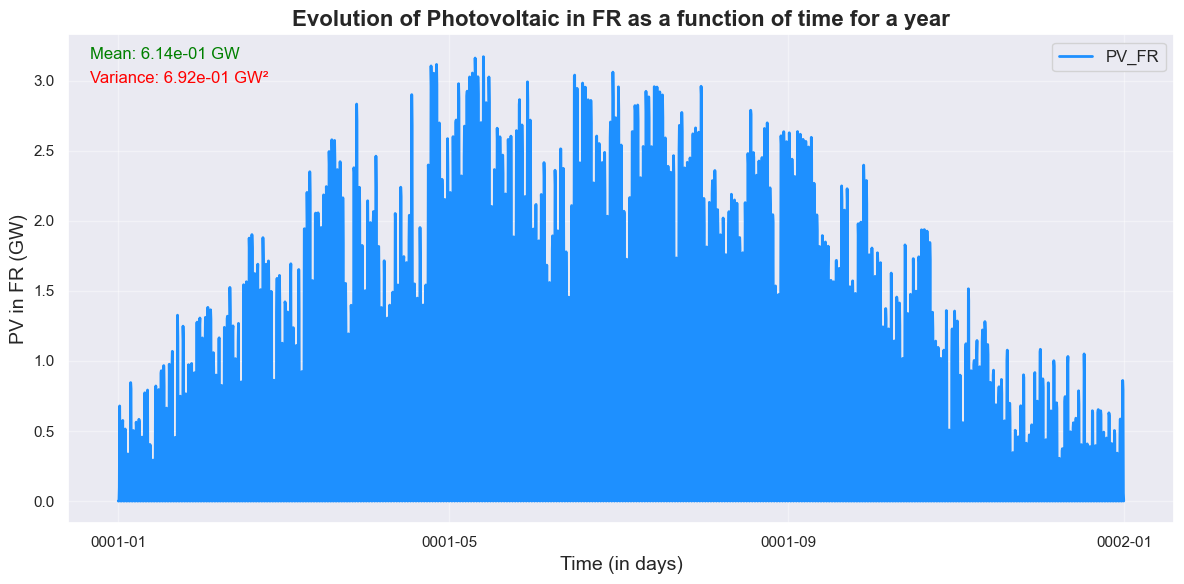

Moyenne de PV_FR : 6.14e-01 GW
Variance de PV_FR : 6.92e-01 GW²


In [53]:
data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
print(data_PV)
# from time 0 to 1000
#data_PV.PV_FR.isel(time=slice(0, 8000), lat=0,lon=0).plot()

# Extraire une tranche des données
data_to_plot = data_PV.PV_FR.isel(time=slice(0, 2920), lat=0, lon=0) #pas de temps 3h donc 8 données/jours 


# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e10  # Conversion de W*10^10 en GW

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values

# Calcul de la variance
variance_value = data_to_plot_in_GW.var(dim='time').values

# Créer le graphique avec des personnalisations
plt.figure(figsize=(12, 6))  # Taille du graphique
data_to_plot_in_GW.plot(color='dodgerblue', linewidth=2, label='PV_FR')  # Ajouter une couleur et une épaisseur

# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Photovoltaic in FR as a function of time for a year", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("PV in FR (GW)", fontsize=14)  # Unité modifiée en GW
plt.legend(fontsize=12)  # Légende pour identifier la courbe
plt.grid(alpha=0.4)  # Ajouter une grille légère pour la lisibilité

# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.95, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.02, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='red')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()

# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de PV_FR : {mean_value:.2e} GW")
print(f"Variance de PV_FR : {variance_value:.2e} GW²")





In [ ]:
data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
print(data_PV)
# from time 0 to 1000
#data_PV.PV_FR.isel(time=slice(0, 8000), lat=0,lon=0).plot()

# Extraire une tranche des données
data_to_plot = data_PV.PV_FR.isel(time=slice(1440,1680 ), lat=0, lon=0) #pas de temps 3h donc 8 données/jours 


# Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
data_to_plot_in_GW = data_to_plot / 1e10  # Conversion de W*10^10 en GW

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values

# Calcul de la variance
variance_value = data_to_plot_in_GW.var(dim='time').values

# Créer le graphique avec des personnalisations
plt.figure(figsize=(12, 6))  # Taille du graphique
data_to_plot_in_GW.plot(color='dodgerblue', linewidth=2, label='PV_FR')  # Ajouter une couleur et une épaisseur

# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Photovoltaic in FR as a function of time for a year", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("PV in FR (GW)", fontsize=14)  # Unité modifiée en GW
plt.legend(fontsize=12)  # Légende pour identifier la courbe
plt.grid(alpha=0.4)  # Ajouter une grille légère pour la lisibilité

# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.95, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.02, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='red')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()

# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de PV_FR : {mean_value:.2e} GW")
print(f"Variance de PV_FR : {variance_value:.2e} GW²")

Analysis of wind data


In [55]:
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"


data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)
print(data_wind)

print(data_wind)  # Résumé global
print(data_wind.variables)  # Liste des variables et leurs dimensions
print(data_wind.attrs)  # Attributs globaux

C:\Users\flore\AppData\Local\Temp\ipykernel_9624\2340199126.py:4: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_dataset(path_wind, use_cftime=True, decode_times=True)


<xarray.Dataset> Size: 46MB
Dimensions:    (lon: 1, lat: 1, time: 292000, bnds: 2)
Coordinates:
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 0.0
  * time       (time) object 2MB 0001-01-01 00:00:00 ... 0100-12-31 21:00:00
Dimensions without coordinates: bnds
Data variables: (12/34)
    time_bnds  (time, bnds) object 5MB ...
    Wind_AL    (time, lat, lon) float32 1MB ...
    Wind_AT    (time, lat, lon) float32 1MB ...
    Wind_BA    (time, lat, lon) float32 1MB ...
    Wind_BE    (time, lat, lon) float32 1MB ...
    Wind_BG    (time, lat, lon) float32 1MB ...
    ...         ...
    Wind_RO    (time, lat, lon) float32 1MB ...
    Wind_RS    (time, lat, lon) float32 1MB ...
    Wind_SE    (time, lat, lon) float32 1MB ...
    Wind_SI    (time, lat, lon) float32 1MB ...
    Wind_SK    (time, lat, lon) float32 1MB ...
    Wind_UK    (time, lat, lon) float32 1MB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conven

Mean Demand: 2.5626351833343506
Variance: 8.605477333068848
Min Demand: 0.00010807353828568012
Max Demand: 12.418728828430176


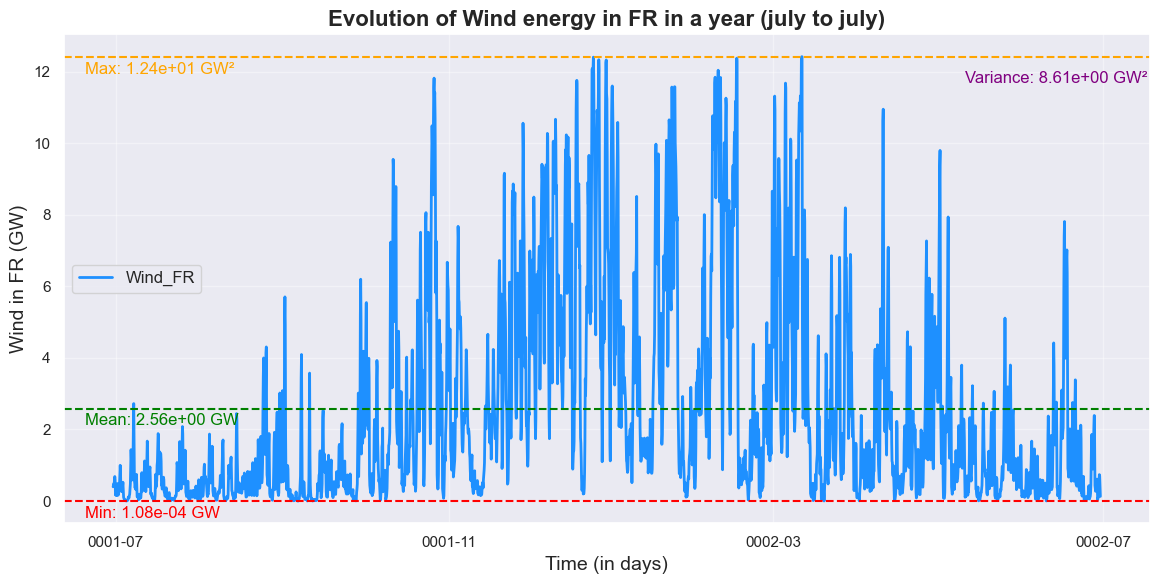

Moyenne de Wind_FR : 2.56e+00 GW
Variance de Wind_FR : 8.61e+00 GW²


In [82]:

# Extraire une tranche des données (sur 7320 points de temps, soit environ 3 ans)
data_to_plot = data_wind.Wind_FR.isel(time=slice(1440, 4360), lat=0, lon=0)

# Convertir les valeurs de W*10^10 en GW (diviser par 10^10)
data_to_plot_in_GW = data_to_plot / 1e10  # Conversion de W*10^10 en GW

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values

# Calcul de la variance
variance_value = data_to_plot_in_GW.var(dim='time').values

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values

# Calcul de la variance
variance_value = data_to_plot_in_GW.var(dim='time').values

# Calcul des statistiques pour la période sélectionnée
min = data_to_plot_in_GW.min().values
max = data_to_plot_in_GW.max().values

# Affichage des statistiques
print(f"Mean Demand: {mean_value}")
print(f"Variance: {variance_value}")
print(f"Min Demand: {min}")
print(f"Max Demand: {max}")

# Créer le graphique avec des personnalisations
plt.figure(figsize=(12, 6))  # Taille du graphique
data_to_plot_in_GW.plot(color='dodgerblue', linewidth=2, label='Wind_FR')  # Ajouter une couleur et une épaisseur

# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Wind energy in FR in a year (july to july)", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Wind in FR (GW)", fontsize=14)  # Unité modifiée en GW
plt.legend(fontsize=12)  # Légende pour identifier la courbe
plt.grid(alpha=0.4)  # Ajouter une grille légère pour la lisibilité

# Ajouter des lignes horizontales pour les statistiques (moyenne, min, max)
plt.axhline(mean_value, color='green', linestyle='--', label=f"Mean: {mean_value:.2f}")
plt.axhline(min, color='red', linestyle='--', label=f"Min: {min:.2f}")
plt.axhline(max, color='orange', linestyle='--', label=f"Max: {max:.2f}")

# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.20, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.83, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='purple')
plt.text(0.02, 0.01, f"Min: {min:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.02, 0.92, f"Max: {max:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='orange')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()

# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de Wind_FR : {mean_value:.2e} GW")
print(f"Variance de Wind_FR : {variance_value:.2e} GW²")



Mean Demand: 0.46251755952835083
Variance: 0.219943106174469
Min Demand: 0.0007606609142385423
Max Demand: 2.7232398986816406


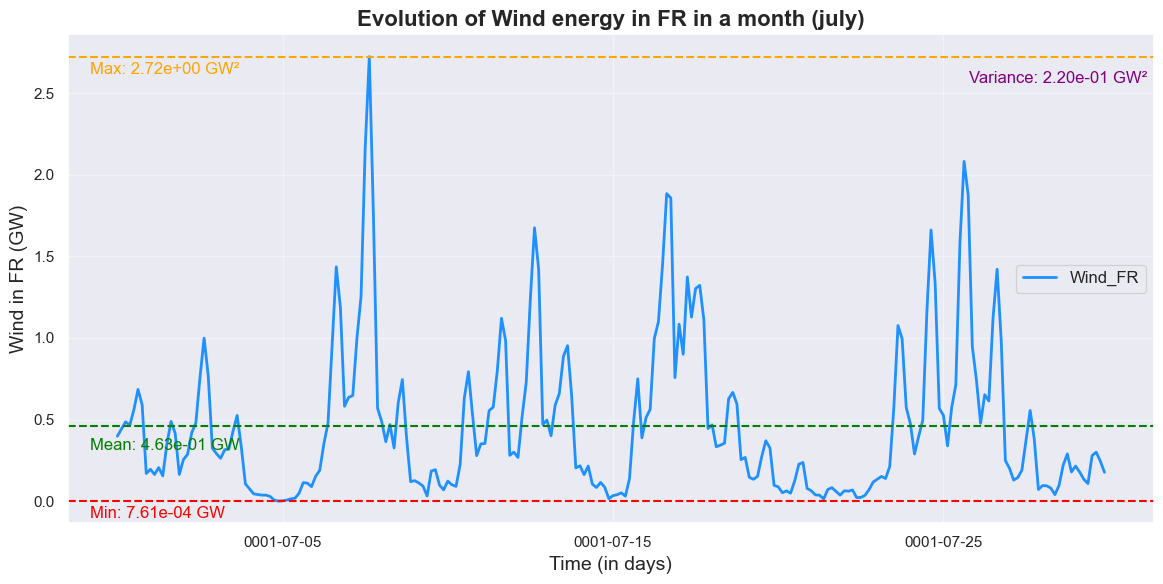

Moyenne de Wind_FR : 4.63e-01 GW
Variance de Wind_FR : 2.20e-01 GW²


In [90]:
# Extraire une tranche des données (sur 7320 points de temps, soit environ 3 ans)
data_to_plot = data_wind.Wind_FR.isel(time=slice(1440, 1680), lat=0, lon=0)

# Convertir les valeurs de W*10^10 en GW (diviser par 10^10)
data_to_plot_in_GW = data_to_plot / 1e10  # Conversion de W*10^10 en GW

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot_in_GW.mean(dim='time').values
std_value = data_to_plot_in_GW.std(dim='time').values

# Calcul de la variance
variance_value = data_to_plot_in_GW.var(dim='time').values

# Calcul des statistiques pour la période sélectionnée
min = data_to_plot_in_GW.min().values
max = data_to_plot_in_GW.max().values

# Affichage des statistiques
print(f"Mean Demand: {mean_value}")
print(f"Variance: {variance_value}")
print(f"Min Demand: {min}")
print(f"Max Demand: {max}")


# Créer le graphique avec des personnalisations
plt.figure(figsize=(12, 6))  # Taille du graphique
data_to_plot_in_GW.plot(color='dodgerblue', linewidth=2, label='Wind_FR')  # Ajouter une couleur et une épaisseur

# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Wind energy in FR in a month (july)", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Wind in FR (GW)", fontsize=14)  # Unité modifiée en GW
plt.legend(fontsize=12)  # Légende pour identifier la courbe
plt.grid(alpha=0.4)  # Ajouter une grille légère pour la lisibilité

# Ajouter des lignes horizontales pour les statistiques (moyenne, min, max)
plt.axhline(mean_value, color='green', linestyle='--', label=f"Mean: {mean_value:.2f}")
plt.axhline(min, color='red', linestyle='--', label=f"Min: {min:.2f}")
plt.axhline(max, color='orange', linestyle='--', label=f"Max: {max:.2f}")


# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.15, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.83, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='purple')
plt.text(0.02, 0.01, f"Min: {min:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='red')
plt.text(0.02, 0.92, f"Max: {max:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='orange')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()

# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de Wind_FR : {mean_value:.2e} GW")
print(f"Variance de Wind_FR : {variance_value:.2e} GW²")


Analysis of demand


In [57]:
path_dem = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\demand\CAM4_F2000_p144_ctrl_demand_timeseries\CAM4_F2000_p144_ctrl_batch_0002.demand_EU15.nc"

data_dem = xr.open_dataset(path_dem, use_cftime=True, decode_times= True)

print(data_dem)  # Résumé global
print(data_dem.variables)  # Liste des variables et leurs dimensions
print(data_dem.attrs)  # Attributs globaux


<xarray.Dataset> Size: 1MB
Dimensions:    (lon: 1, lat: 1, time: 36500, bnds: 2)
Coordinates:
  * lon        (lon) float64 8B 0.0
  * lat        (lat) float64 8B 0.0
  * time       (time) object 292kB 0001-01-01 10:30:01 ... 0100-12-31 10:30:01
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 584kB ...
    Demand     (time, lat, lon) float32 146kB ...
Attributes:
    CDI:          Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Wed Sep 15 19:52:20 2021: cdo -s -O -mergetime demand_EU15_...
    CDO:          Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/...
Frozen({'lon': <xarray.IndexVariable 'lon' (lon: 1)> Size: 8B
array([0.])
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X, 'lat': <xarray.IndexVariable 'lat' (lat: 1)> Size: 8B
array([0.])
Attributes:
    standard_name:  latitude
    long_name:    

C:\Users\flore\AppData\Local\Temp\ipykernel_9624\2768291712.py:3: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_dem = xr.open_dataset(path_dem, use_cftime=True, decode_times= True)


Mean Demand: 7.719070911407471
Variance: 0.3392603099346161
Min Demand: 7.115299701690674
Max Demand: 9.39090633392334


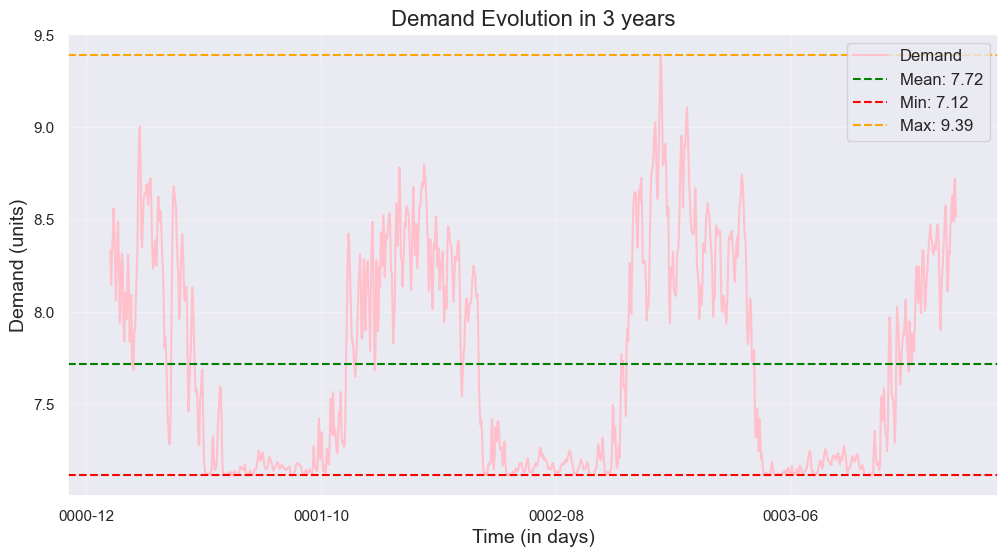

In [116]:

demand_series = data_dem.Demand.isel(lat=0, lon=0)  

# Extraire une tranche spécifique de la demande (par exemple, de l'indice 0 à 1095 pour 3 ans)
demand_slice = demand_series.isel(time=slice(0, 1095))

# Réduire les dimensions supplémentaires (lat, lon) pour obtenir une série 1D
demand_slice = demand_slice.squeeze()  # Supprime les dimensions de taille 1 (lat, lon)

# Extraire la tranche de temps correspondante
time_slice = data_dem.time.isel(time=slice(0, 1095))

# Calcul des statistiques pour la période sélectionnée
mean_demand = demand_slice.mean().values
variance_demand = demand_slice.var().values
min_demand = demand_slice.min().values
max_demand = demand_slice.max().values

# Affichage des statistiques
print(f"Mean Demand: {mean_demand}")
print(f"Variance: {variance_demand}")
print(f"Min Demand: {min_demand}")
print(f"Max Demand: {max_demand}")

# Créer le graphique en utilisant la tranche de temps et de demande
plt.figure(figsize=(12, 6))

# Tracer les données avec time_slice et demand_slice
plt.plot(time_slice.values, demand_slice.values, color='pink', label="Demand")

# Ajouter des lignes horizontales pour les statistiques (moyenne, min, max)
plt.axhline(mean_demand, color='green', linestyle='--', label=f"Mean: {mean_demand:.2f}")
plt.axhline(min_demand, color='red', linestyle='--', label=f"Min: {min_demand:.2f}")
plt.axhline(max_demand, color='orange', linestyle='--', label=f"Max: {max_demand:.2f}")

# Ajouter un titre et des étiquettes
plt.title("Demand Evolution in 3 years", fontsize=16)
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Demand (units)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Afficher le graphique
plt.show()




In [59]:
path_scenario = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\demand\scenarios\scenario_EC_REF2016.nc"
data_scenario = xr.open_dataset(path_scenario, use_cftime=True, decode_times=False)

print(data_scenario)  # Résumé global
print(data_scenario.variables)  # Liste des variables et leurs dimensions
print(data_scenario.attrs)  # Attributs globaux


<xarray.Dataset> Size: 1MB
Dimensions:     (lat: 51, lon: 54, time: 1)
Coordinates:
  * lat         (lat) float32 204B 25.92 26.86 27.8 28.74 ... 71.15 72.09 73.04
  * lon         (lon) float32 216B -20.0 -18.75 -17.5 ... 43.75 45.0 46.25
  * time        (time) float64 8B -7.298e+05
Data variables: (12/56)
    IC_Wind_AT  (lat, lon) float64 22kB ...
    IC_Wind_BE  (lat, lon) float64 22kB ...
    IC_Wind_BG  (lat, lon) float64 22kB ...
    IC_Wind_CY  (lat, lon) float64 22kB ...
    IC_Wind_CZ  (lat, lon) float64 22kB ...
    IC_Wind_DE  (lat, lon) float64 22kB ...
    ...          ...
    IC_PV_PT    (lat, lon) float64 22kB ...
    IC_PV_RO    (lat, lon) float64 22kB ...
    IC_PV_SE    (lat, lon) float64 22kB ...
    IC_PV_SI    (lat, lon) float64 22kB ...
    IC_PV_SK    (lat, lon) float64 22kB ...
    IC_PV_UK    (lat, lon) float64 22kB ...
Attributes:
    units:    W/m2
Frozen({'lat': <xarray.IndexVariable 'lat' (lat: 51)> Size: 204B
array([25.916231, 26.858639, 27.801046, 28.7434

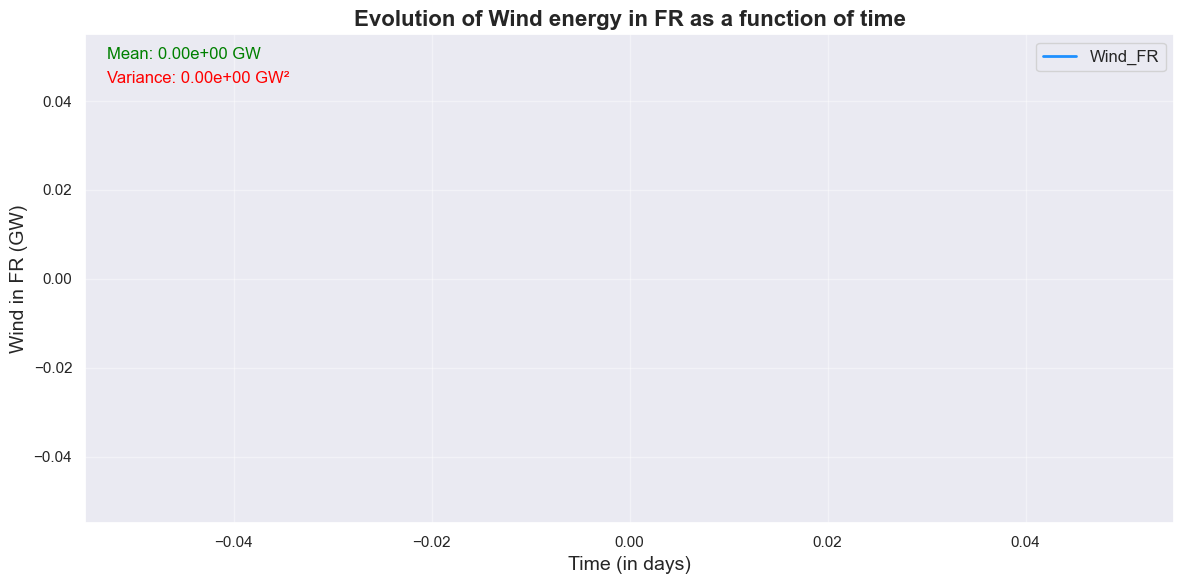

Moyenne de Wind_FR : 0.00e+00 GW
Variance de Wind_FR : 0.00e+00 GW²


In [60]:
# Extraire une tranche des données (sur 7320 points de temps, soit environ 3 ans)
data_to_plot = data_scenario.IC_Wind_FR.isel(lat=0, lon=0)

# Calcul de la moyenne et de l'écart-type
mean_value = data_to_plot.mean().values
std_value = data_to_plot.std().values

# Calcul de la variance
variance_value = data_to_plot.var().values

# Créer le graphique avec des personnalisations
plt.figure(figsize=(12, 6))  # Taille du graphique
plt.plot(data_to_plot, color='dodgerblue', linewidth=2, label='Wind_FR')  # Ajouter une couleur et une épaisseur

# Ajouter un titre, des étiquettes d'axes et une légende
plt.title("Evolution of Wind energy in FR as a function of time", fontsize=16, fontweight='bold')
plt.xlabel("Time (in days)", fontsize=14)
plt.ylabel("Wind in FR (GW)", fontsize=14)  # Unité modifiée en GW
plt.legend(fontsize=12)  # Légende pour identifier la courbe
plt.grid(alpha=0.4)  # Ajouter une grille légère pour la lisibilité

# Ajouter les valeurs de moyenne et variance sur le graphique
plt.text(0.02, 0.95, f"Mean: {mean_value:.2e} GW", transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.02, 0.90, f"Variance: {variance_value:.2e} GW²", transform=plt.gca().transAxes, fontsize=12, color='red')

# Ajuster la mise en page et afficher
plt.tight_layout()
plt.show()

# Affichage des valeurs de moyenne et variance dans la console
print(f"Moyenne de Wind_FR : {mean_value:.2e} GW")
print(f"Variance de Wind_FR : {variance_value:.2e} GW²")





In [99]:
!pip install cartopy

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --------------- ------------------------ 4.2/11.0 MB 20.9 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 23.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 22.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ---------------------------------------- 6.2/6.2 MB 34.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.7 MB/s eta 0:00:00


In [105]:
scenario

<xarray.Dataset> Size: 7MB
Dimensions:              (lat: 92, lon: 135, time: 1)
Coordinates:
  * lat                  (lat) float64 736B 72.25 71.75 71.25 ... 27.25 26.75
  * lon                  (lon) float64 1kB -21.75 -21.25 -20.75 ... 44.75 45.25
  * time                 (time) datetime64[ns] 8B 2000-01-01T12:00:00
Data variables: (12/67)
    IC_Wind_AL           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_AL             (lat, lon) float64 99kB ...
    IC_Wind_AT           (lat, lon) float64 99kB ...
    IC_PV_AT             (lat, lon) float64 99kB ...
    IC_Wind_BA           (lat, lon) float64 99kB ...
    IC_PV_BA             (lat, lon) float64 99kB ...
    ...                   ...
    IC_Wind_SI           (lat, lon) float64 99kB ...
    IC_PV_SI             (lat, lon) float64 99kB ...
    IC_Wind_SK           (lat, lon) float64 99kB ...
    IC_PV_SK             (lat, lon) float64 99kB ...
    IC_Wind_UK           (lat, lon) float64 99kB ...
    IC_PV_UK             (lat, lon) float64 99kB ...
Attributes:
    units:    W/m2

In [112]:
scenario

<xarray.Dataset> Size: 7MB
Dimensions:              (lat: 92, lon: 135, time: 1)
Coordinates:
  * lat                  (lat) float64 736B 72.25 71.75 71.25 ... 27.25 26.75
  * lon                  (lon) float64 1kB -21.75 -21.25 -20.75 ... 44.75 45.25
  * time                 (time) datetime64[ns] 8B 2000-01-01T12:00:00
Data variables: (12/67)
    IC_Wind_AL           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_AL             (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_Wind_AT           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_AT             (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_Wind_BA           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_BA             (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    ...                   ...
    IC_Wind_SI           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_SI             (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_Wind_SK           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_SK             (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_Wind_UK           (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
    IC_PV_UK             (lat, lon) float64 99kB nan nan nan nan ... nan nan nan
Attributes:
    units:    W/m2

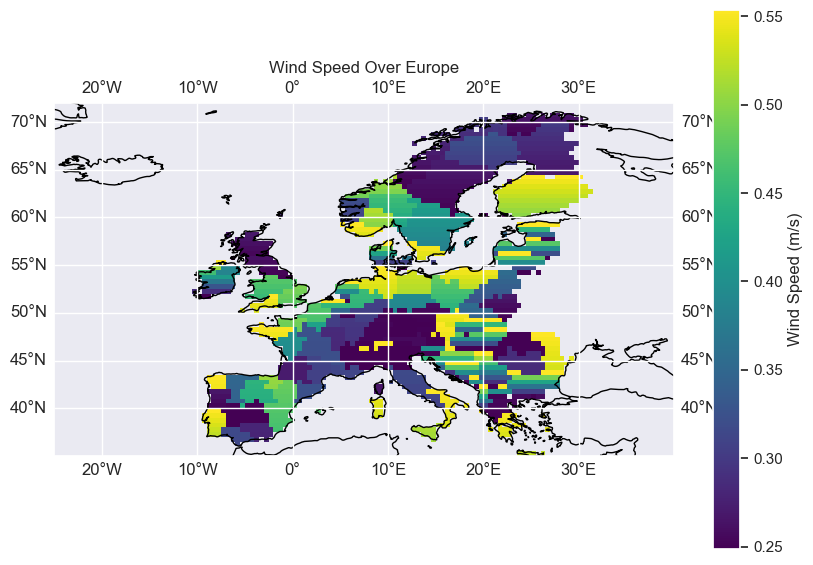

In [115]:
scenario_X7_path = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\demand\scenarios\scenario_eHighway_X7.nc"

scenario = xr.open_dataset(scenario_X7_path)
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr




# Create the plot
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent to Europe
ax.set_extent([-25, 40, 35, 72], crs=ccrs.PlateCarree())  # Longitude and latitude bounds for Europe

# Add map features
ax.coastlines()
ax.gridlines(draw_labels=True)

# Plot the wind data (assuming it's a 2D field)
# Modify the wind data selection if it has multiple time steps or levels
# Extract the wind data (replace 'wind' with the actual variable name from your dataset)
for var_name, var_data in scenario.items():
    # Check if 'IC' is part of the variable name
    if 'IC_Wind' in var_name and 'offshore' not in var_name:
        wind_data = var_data
        c = ax.pcolormesh(wind_data.lon, wind_data.lat, wind_data, cmap='viridis', transform=ccrs.PlateCarree())

# Add a colorbar
fig.colorbar(c, ax=ax, orientation='vertical', label='Wind Capicty factor')

# Title
ax.set_title("Wind Speed Over Europe")

# Show the plot
plt.show()


In [98]:
# compute the mean of the wind data

<xarray.Dataset> Size: 7MB
Dimensions:              (lat: 92, lon: 135, time: 1)
Coordinates:
  * lat                  (lat) float64 736B 72.25 71.75 71.25 ... 27.25 26.75
  * lon                  (lon) float64 1kB -21.75 -21.25 -20.75 ... 44.75 45.25
  * time                 (time) datetime64[ns] 8B 2000-01-01T12:00:00
Data variables: (12/67)
    IC_Wind_AL           (lat, lon) float64 99kB ...
    IC_PV_AL             (lat, lon) float64 99kB ...
    IC_Wind_AT           (lat, lon) float64 99kB ...
    IC_PV_AT             (lat, lon) float64 99kB ...
    IC_Wind_BA           (lat, lon) float64 99kB ...
    IC_PV_BA             (lat, lon) float64 99kB ...
    ...                   ...
    IC_Wind_SI           (lat, lon) float64 99kB ...
    IC_PV_SI             (lat, lon) float64 99kB ...
    IC_Wind_SK           (lat, lon) float64 99kB ...
    IC_PV_SK             (lat, lon) float64 99kB ...
    IC_Wind_UK           (lat, lon) float64 99kB ...
    IC_PV_UK             (lat, lon) float64 99kB ...
Attributes:
    units:    W/m2

C:\Users\flore\AppData\Local\Temp\ipykernel_5612\2980314188.py:6: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_wind = xr.open_mfdataset(path_wind, use_cftime=True, decode_times=True)


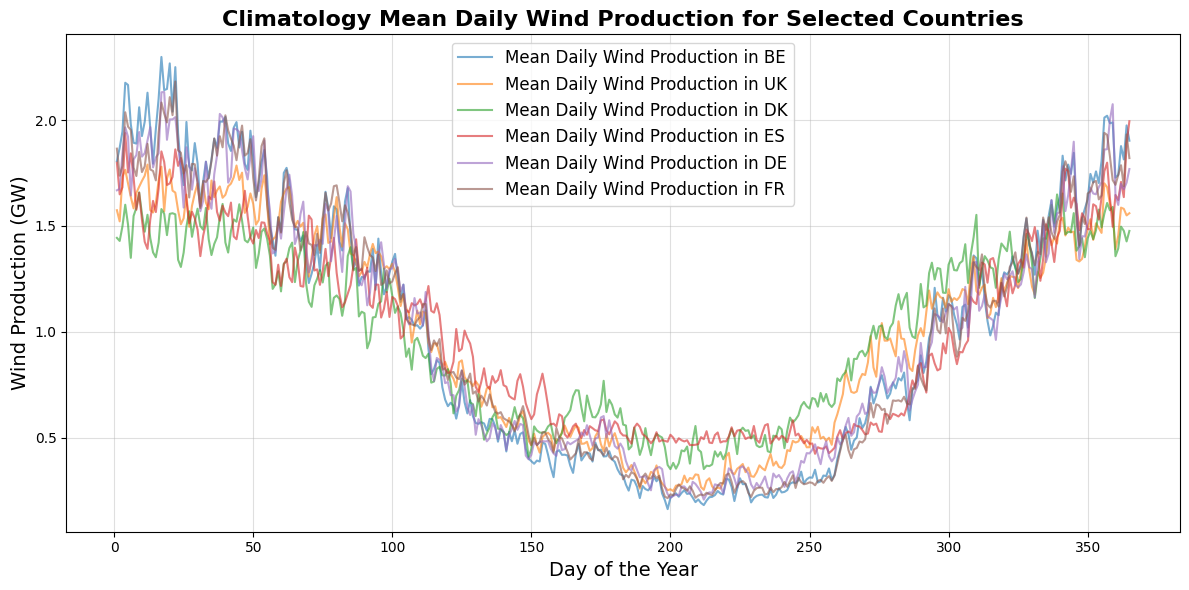

In [1]:
import matplotlib.pyplot as plt
import xarray as xr

# Charger les données
path_wind = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_eol\CAM4_F2000_p144_ctrl_Wind_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.Wind.nc"
data_wind = xr.open_mfdataset(path_wind, use_cftime=True, decode_times=True)

# Liste des pays à traiter
countries = ['BE', 'UK', 'DK', 'ES', 'DE', 'FR']

# Initialiser une figure pour afficher les résultats
plt.figure(figsize=(12, 6))

# Itérer sur la liste des pays
for country in countries:
    # Vérifier si la variable pour ce pays existe dans data_wind
    country_var = f'Wind_{country}'  # Exemple: 'Wind_FR', 'Wind_UK', etc.
    
    if country_var in data_wind.variables:
        # Extraire les données pour chaque pays
        data_to_plot = data_wind[country_var].isel(time=slice(0, 290000), lat=0, lon=0)  # Ajuste si nécessaire
        
        # Convertir les valeurs de W*10^10 en GW (diviser par 10^9)
        data_to_plot_in_GW = data_to_plot / 1e9  # Conversion en GW
        
        # Resampling à une fréquence journalière
        data_daily = data_to_plot_in_GW.resample(time='D').mean()
        
        # Extraire le jour de l'année et l'année
        data_daily['day_of_year'] = data_daily['time'].dt.dayofyear
        data_daily['year'] = data_daily['time'].dt.year
        
        # Calculer la moyenne pour chaque jour de l'année
        daily_mean_per_day = data_daily.groupby('day_of_year').mean('time')

        #Normaliser la production du pays 
        daily_mean_per_day = daily_mean_per_day / daily_mean_per_day.mean()
        
        # Tracer la courbe pour chaque pays
        plt.plot(daily_mean_per_day['day_of_year'], daily_mean_per_day, label=f'Mean Daily Wind Production in {country}', alpha=0.6)

# Ajouter un titre, des labels et une légende
plt.title("Normalized Climatology Mean Daily Wind Production for Selected Countries", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("Wind Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

C:\Users\flore\AppData\Local\Temp\ipykernel_23824\2591813562.py:7: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)


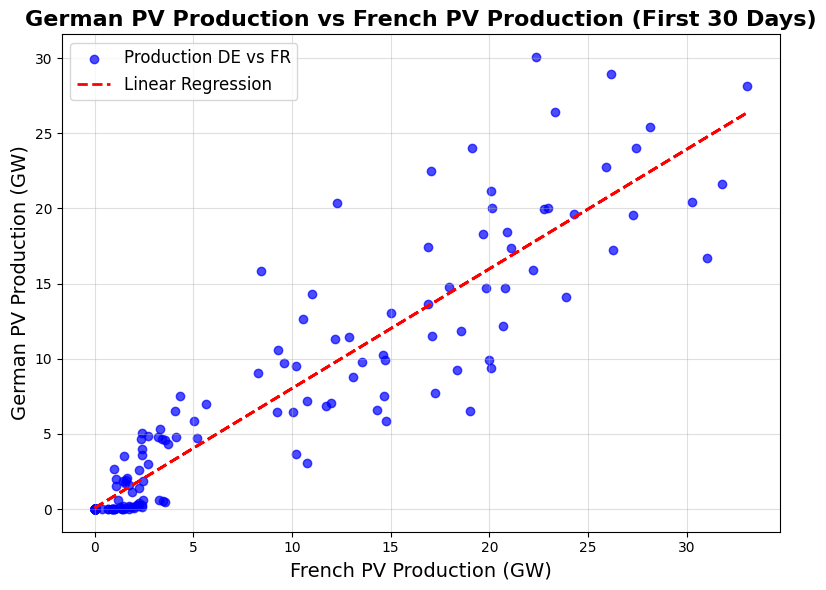

In [7]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Charger le fichier pour batch_0001
path_PV = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\prod_PV\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\CAM4_F2000_p144_ctrl_batch_0001.eHighway.X7.PV.nc"
data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)

# Extraire les variables pour la France et l'Allemagne
PV_FR = data_PV['PV_FR'].isel(time=slice(0, 248), lat=0, lon=0)  # France
PV_DE = data_PV['PV_DE'].isel(time=slice(0, 248), lat=0, lon=0)  # Allemagne

# Convertir les valeurs de W*10^10 en GW
PV_FR_GW = PV_FR / 1e9
PV_DE_GW = PV_DE / 1e9

# Créer un nuage de points (scatter plot)
plt.figure(figsize=(8, 6))
plt.scatter(PV_FR_GW, PV_DE_GW, color='blue', alpha=0.7, label='Production DE vs FR')
# plot a linear regression 
# Calculer la regression linéaire et la plotter sur le graphe
slope, intercept = np.polyfit(PV_FR_GW, PV_DE_GW, 1)
fit = slope * PV_FR_GW + intercept
plt.plot(PV_FR_GW, fit, color='red', linestyle='--', linewidth=2, label='Linear Regression')


#créer une ligne de pente 1 tout le long du graphe
#plt.plot([0, 30], [0, 30], color='red', linestyle='-', linewidth=2, label='1:1 Line')

# Ajouter un titre et des labels
plt.title("German PV Production vs French PV Production (First 30 Days)", fontsize=16, fontweight='bold')
plt.xlabel("French PV Production (GW)", fontsize=14)
plt.ylabel("German PV Production (GW)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()
